https://seaborn.pydata.org/generated/seaborn.barplot.html
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
https://seaborn.pydata.org/tutorial/color_palettes.html
http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/generated/seaborn.color_palette.html#:~:text=Matplotlib%20palettes%20can%20be%20specified,colors%20can%20also%20be%20reversed).
https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html
https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette
https://stackoverflow.com/questions/30105541/creating-a-dark-reversed-color-palette-in-seaborn
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html
https://nycdatascience.edu/blog/student-works/key-insights-ames-iowa-housing-data-multiple-factors-behind-house-price/
https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://www.youtube.com/watch?v=SNLfbI5xtMU&ab_channel=DCPWebDesigners

https://www.google.com/search?q=gimp+2.10.30+where+is+scale+tool&rlz=1C1UUXU_esAR985AR985&sxsrf=ALiCzsb1ZUSxefOWqtpP3Kh1C5vrzd0_ww%3A1651455606008&ei=djZvYssQkr3WxA_Up4fYBw&ved=0ahUKEwjLo4jG17_3AhWSnpUCHdTTAXsQ4dUDCA4&uact=5&oq=gimp+2.10.30+where+is+scale+tool&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BwgjELACECdKBAhBGABKBAhGGABQ6wpYkhpgohxoAXABeACAAWiIAbwGkgEDNy4ymAEAoAEByAEIwAEB&sclient=gws-wiz



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

#filtrado de warnings
warnings.filterwarnings('ignore')

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

# elimino la notacion cientifica en los outputs en pandas
pd.options.display.float_format = '{:20,.2f}'.format

#House Prices

In [ ]:
house_df = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/house_prices.csv', usecols=['SalePrice', 'MSZoning'])

In [ ]:
house_df.head()

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MSZoning   1460 non-null   object
 1   SalePrice  1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


##Density plot

In [ ]:
(755000 - 34900)/38

18950.0

In [ ]:
list(range(35000, 500000, 35000))

[35000,
 70000,
 105000,
 140000,
 175000,
 210000,
 245000,
 280000,
 315000,
 350000,
 385000,
 420000,
 455000,
 490000]

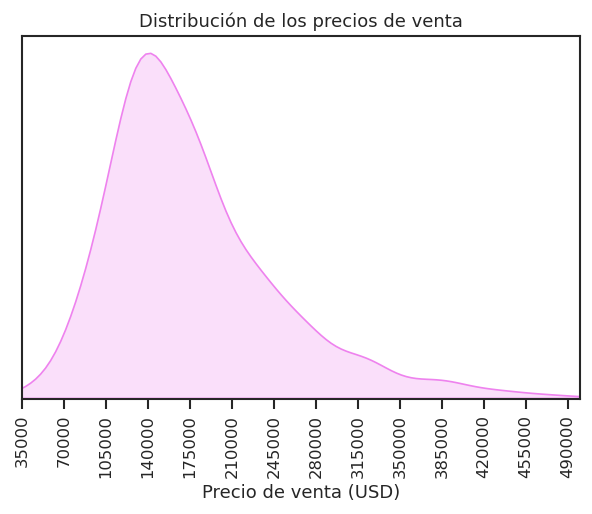

In [ ]:
labels = list(range(35000, 500000, 35000))
plt.rcParams['figure.dpi'] = 120
sns.kdeplot(data=house_df, x='SalePrice', fill=True, color='violet')
plt.title("Distribución de los precios de venta")
plt.ylabel("")
plt.xlabel("Precio de venta (USD)")
plt.xlim(34900, 500000)
plt.xticks(labels, rotation=90)
plt.yticks([])
plt.show()

##Violin plot

In [ ]:
auxiliar = house_df[house_df['SalePrice'] <= 500000]

Hago esto para achicar un poco las puntas superiores de algunos *density plot*.

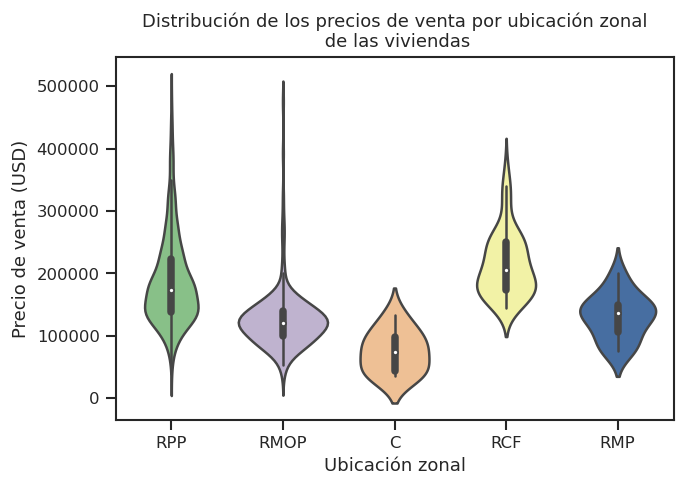

In [ ]:
sns.violinplot(data=auxiliar, x='MSZoning', y='SalePrice', palette="Accent")
plt.title("Distribución de los precios de venta por ubicación zonal\n de las viviendas")
ticks = range(5)
labels = ["RPP", "RMOP", "C", "RCF", "RMP"]
plt.xticks(ticks, labels)
plt.ylabel("Precio de venta (USD)")
plt.xlabel("Ubicación zonal")
plt.show()

* RPP = Residencial poco poblada
* RMOP = Residencial mas o menos pobalda
* C = Comercial
* RCF = Residencial de casas flotantes
* RMP = Residencial muy poblada



---



#Sysarmy

https://www.iprofesional.com/negocios/315608-pymes-diferencia-entre-micro-pequena-y-mediana-empresa

In [ ]:
sysarmy_df = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/sysarmy_rellenado.csv')

In [ ]:
sysarmy_df = sysarmy_df.drop(columns='Unnamed: 0')

In [ ]:
pd.to_numeric(sysarmy_df['Salario mensual o retiro BRUTO (en tu moneda local)'], errors='coerce').isnull().sum()

10

In [ ]:
sysarmy_df['Salario mensual o retiro BRUTO (en tu moneda local)'] = pd.to_numeric(sysarmy_df['Salario mensual o retiro BRUTO (en tu moneda local)'], errors='coerce')

##Bar plot



In [ ]:
sysarmy_empresas_df = sysarmy_df.groupby('Cantidad de personas en tu organización').agg({'Salario mensual o retiro BRUTO (en tu moneda local)':'mean'})

In [ ]:
sysarmy_empresas_ordenado_df = sysarmy_empresas_df.sort_values('Salario mensual o retiro BRUTO (en tu moneda local)', ascending=False)

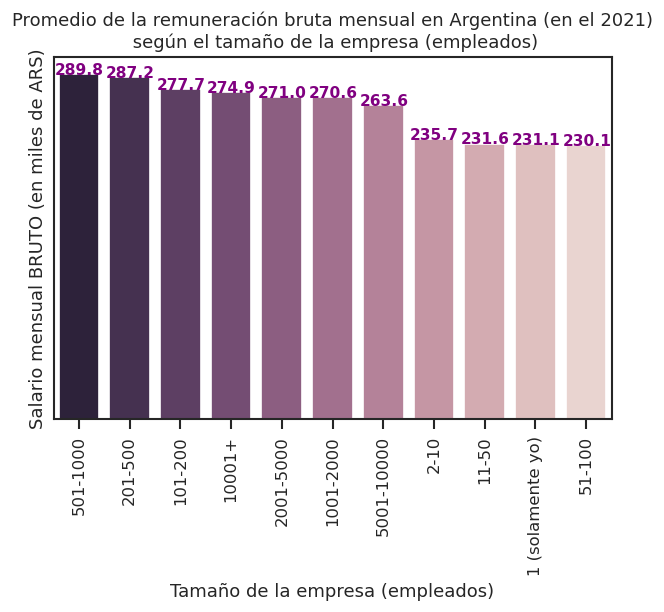

In [ ]:
plt.rcParams['figure.dpi'] = 120
sns.set_palette(sns.cubehelix_palette(n_colors=11, reverse=True))
ax = sns.barplot(data=sysarmy_empresas_ordenado_df, x=sysarmy_empresas_ordenado_df.index, y=sysarmy_empresas_ordenado_df['Salario mensual o retiro BRUTO (en tu moneda local)'])
plt.xticks(rotation=90)
plt.yticks([])
plt.title("Promedio de la remuneración bruta mensual en Argentina (en el 2021)\n según el tamaño de la empresa (empleados)")
plt.ylabel("Salario mensual BRUTO (en miles de ARS)")
plt.xlabel("Tamaño de la empresa (empleados)")

for i, v in enumerate(list(sysarmy_empresas_ordenado_df['Salario mensual o retiro BRUTO (en tu moneda local)'])):
    un_decimal = round(v, 1)
    miles = un_decimal*1e-3
    ax.text(i-0.47, v, round(miles, 1), color='purple', fontweight='bold', fontsize=9.2)

plt.show()

##Box plot

In [ ]:
sysarmy_df['Salario mensual o retiro BRUTO (en tu moneda local)'].max()

8536797.0

Le digo que sea un poco menor al maximo porque si no cambia la escala (de miles pasa a millones)

In [ ]:
sysarmy_reducido_df = sysarmy_df[sysarmy_df['Salario mensual o retiro BRUTO (en tu moneda local)'] < 850000]

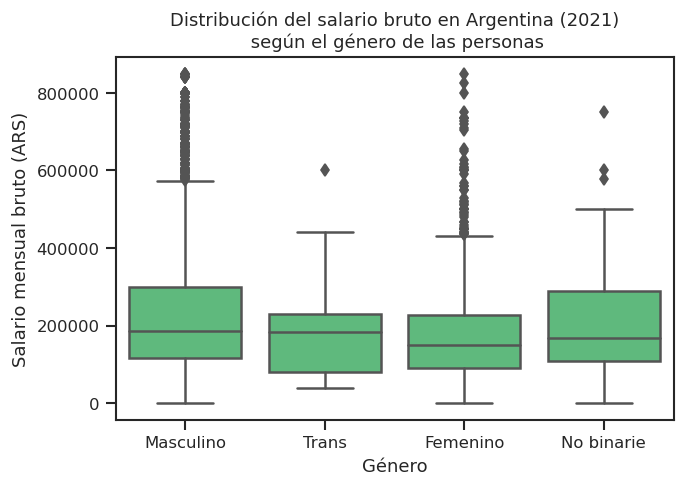

In [ ]:
sns.boxplot(data=sysarmy_reducido_df, x='Me identifico (género)', y='Salario mensual o retiro BRUTO (en tu moneda local)', color='#50C878')
plt.title("Distribución del salario bruto en Argentina (2021)\n según el género de las personas")
plt.ylabel("Salario mensual bruto (ARS)")
plt.xlabel("Género")
plt.show()

#Rain in Australia

In [ ]:
weatherAUS_df = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/weatherAUS.csv', usecols=['Rainfall', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm'])

In [ ]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rainfall     142199 non-null  float64
 1   Humidity9am  142806 non-null  float64
 2   Humidity3pm  140953 non-null  float64
 3   Pressure9am  130395 non-null  float64
 4   Pressure3pm  130432 non-null  float64
dtypes: float64(5)
memory usage: 5.5 MB


##Bar plot

Segun [AMET](http://www.aemet.es/es/eltiempo/prediccion/provincias/ayuda) podemos clasificar las lluvias en 5 grupos:
*   Débiles:	≤ 2mm
*   Moderadas:	> 2mm y ≤ 15mm
*   Fuertes:	> 15mm y ≤ 30mm
*   Muy fuertes:	> 30mm y ≤ 60mm
*   Torrenciales: > 60mm

In [ ]:
weatherAUS_df['Rainfall'] = weatherAUS_df.Rainfall.fillna(0)

In [ ]:
serie_dias_con_lluvia = weatherAUS_df[weatherAUS_df['Rainfall'] > 0]['Rainfall']

min_value = serie_dias_con_lluvia.min()
max_value = serie_dias_con_lluvia.max()

bins=[min_value, 2, 15, 30, 60, max_value]
labels=['Débiles', 'Moderadas', 'Fuertes', 'Muy Fuertes', 'Torrenciales']

lst = serie_dias_con_lluvia.tolist()
df_clasificacion_lluvias = pd.cut(lst, bins=bins, include_lowest=True, labels=labels).value_counts().to_frame()

df_clasificacion_lluvias_aux = df_clasificacion_lluvias.copy()
df_clasificacion_lluvias_aux.reset_index(inplace=True)
df_clasificacion_lluvias_aux.rename(columns={'index':'Clasificacion', 0: 'Cantidad ocurrencias'}, inplace=True)

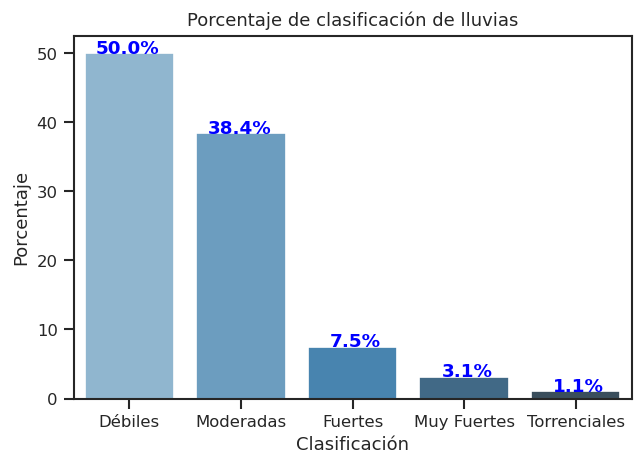

In [ ]:
serie = df_clasificacion_lluvias[0].div(df_clasificacion_lluvias[0].pipe(sum)).mul(100)
ax = sns.barplot(x=list(serie.index), y=list(serie.values), palette='Blues_d')
plt.title("Porcentaje de clasificación de lluvias")
plt.ylabel("Porcentaje")
plt.tick_params(labelrotation=0)
plt.xlabel("Clasificación")

for i, v in enumerate(list(serie.values)):
    centrar = .3
    if i > 1:
      centrar = .2
    
    ax.text(i-(centrar), v, str(round(v, 1)) + '%', color='blue', fontweight='bold', fontsize=11)


plt.show()

##Heatmap

[Humedad](https://lisbdnet.com/what-is-low-humidity-outdoors/#:~:text=less%20than%20or%20equal%20to,in%20the%20air%2C%20becoming%20oppressive.)
[Presión](https://www.thoughtco.com/how-to-read-a-barometer-3444043)

In [ ]:
weatherAUS_df['PressureMo'] = weatherAUS_df.Pressure9am.dropna()

In [ ]:
weatherAUS_df['PressureAf'] = weatherAUS_df.Pressure3pm.dropna()

In [ ]:
weatherAUS_df['PressureDay'] = (weatherAUS_df.PressureMo + weatherAUS_df.PressureAf)/2

In [ ]:
weatherAUS_df['HumidityMo'] = weatherAUS_df.Humidity9am.dropna()

In [ ]:
weatherAUS_df['HumidityAf'] = weatherAUS_df.Humidity3pm.dropna()

In [ ]:
weatherAUS_df['HumidityDay'] = (weatherAUS_df.HumidityMo + weatherAUS_df.HumidityAf)/2

In [ ]:
def transformar_p(valor):
  if valor < 1009.144:
    return 'Baja'

  if valor < 1022.689:
    return 'Normal'
  
  return 'Alta'

def transformar_h(valor):
  if valor < 55:
    return 'Baja'

  if valor < 65:
    return 'Media'
  
  return 'Alta'

In [ ]:
weatherAUS_df['PressureDay'] = weatherAUS_df.PressureDay.map(lambda x: transformar_p(x))

In [ ]:
weatherAUS_df['HumidityDay'] = weatherAUS_df.HumidityAf.map(lambda x: transformar_h(x))

In [ ]:
matrix = pd.pivot_table(weatherAUS_df, 
                        values='Rainfall', index='PressureDay', columns='HumidityDay', aggfunc='mean')

In [ ]:
matrix

HumidityDay,Alta,Baja,Media
PressureDay,,,
Alta,3.65,0.53,1.53
Baja,9.90,1.85,4.94
Normal,4.81,0.68,2.22


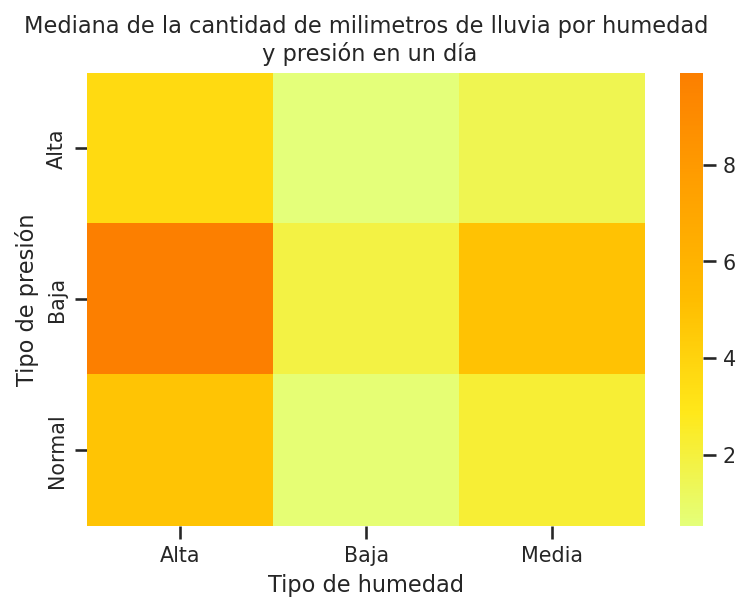

In [ ]:
plt.figure(dpi=150)
sns.heatmap(matrix, cmap='Wistia')
plt.title("Mediana de la cantidad de milímetros de lluvia por humedad\n y presión en un día")
plt.ylabel("Tipo de presión")
plt.xlabel("Tipo de humedad")
plt.show()

#Visu a elección

In [2]:
videogames_df = pd.read_csv('/content/drive/MyDrive/TP_Datos_1C2022/vgsales.csv')

In [3]:
videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
for ele in videogames_df.Name.unique():
  if "auto" in ele.lower():
    print(ele)

Grand Theft Auto V
Grand Theft Auto: San Andreas
Grand Theft Auto: Vice City
Grand Theft Auto III
Grand Theft Auto IV
Grand Theft Auto: Liberty City Stories
Grand Theft Auto: Vice City Stories
Grand Theft Auto 2
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City
Grand Theft Auto
Grand Theft Auto: Chinatown Wars
Transformers: Autobots / Decepticons
Automobili Lamborghini
Transformers: Dark of the Moon - Autobots/Decepticons
Auto Modellista
Full Auto
GRID Autosport
Full Auto 2: Battlelines
Grand Theft Auto: Mission Pack #1, London 1969
Auto Destruct
Crash Time: Autobahn Pusuit


In [5]:
gtav = 'Grand Theft Auto V'
gtasa = 'Grand Theft Auto: San Andreas'
gtavc = 'Grand Theft Auto: Vice City'
gta3 = 'Grand Theft Auto III'
gta4 = 'Grand Theft Auto IV'
gtalcs = 'Grand Theft Auto: Liberty City Stories'
gtavcs = 'Grand Theft Auto: Vice City Stories'
gta2 = 'Grand Theft Auto 2'
pack = 'Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City'
gta = 'Grand Theft Auto'
gtacw = 'Grand Theft Auto: Chinatown Wars'

In [6]:
videogames_gta_df = videogames_df[(videogames_df['Name'] == gtav) | (videogames_df['Name'] == gtasa) | (videogames_df['Name'] == gtavc) | (videogames_df['Name'] == gta3)
 | (videogames_df['Name'] == gta4) | (videogames_df['Name'] == gtalcs) | (videogames_df['Name'] == gtavcs) | (videogames_df['Name'] == gta2) | (videogames_df['Name'] == pack)
 | (videogames_df['Name'] == gta) | (videogames_df['Name'] == gtacw)]

In [7]:
videogames_gta_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,"2,013.00",Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,"2,004.00",Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,"2,013.00",Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,"2,002.00",Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,"2,001.00",Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,"2,014.00",Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
51,52,Grand Theft Auto IV,X360,"2,008.00",Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,"2,008.00",Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
90,91,Grand Theft Auto: Liberty City Stories,PSP,"2,005.00",Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
197,198,Grand Theft Auto V,XOne,"2,014.00",Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08


In [8]:
gta_ventas_df = videogames_gta_df.groupby('Name').agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)

In [9]:
gta_ventas_df

,Global_Sales
Name,
Grand Theft Auto V,55.92
Grand Theft Auto: San Andreas,23.86
Grand Theft Auto IV,22.47
Grand Theft Auto: Vice City,16.19
Grand Theft Auto III,13.11
Grand Theft Auto: Liberty City Stories,11.26
Grand Theft Auto: Vice City Stories,6.05
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City,4.21
Grand Theft Auto 2,3.42


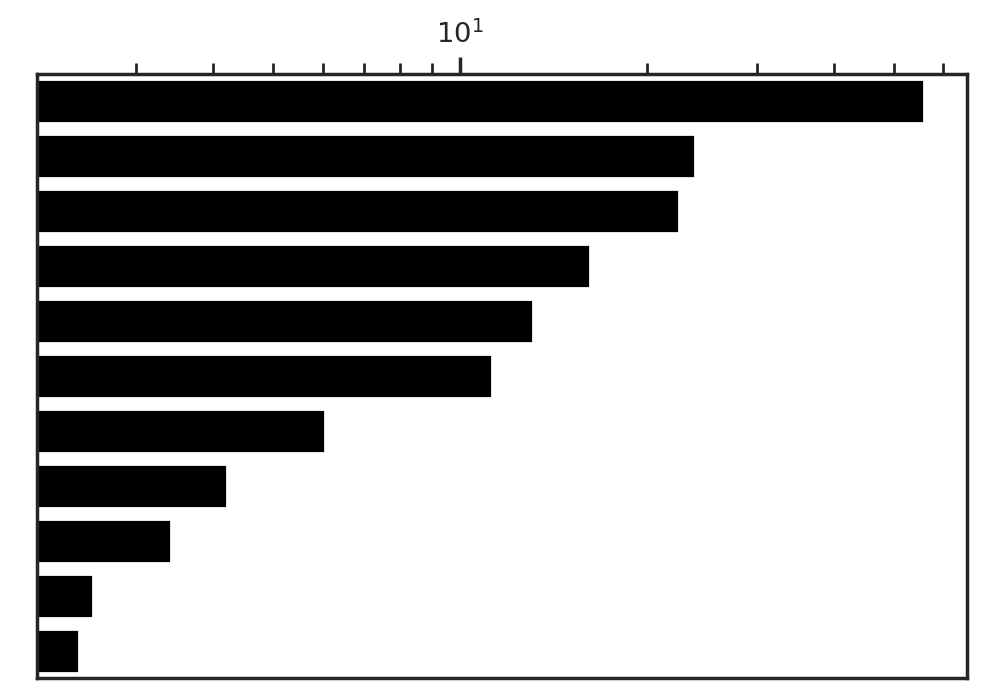

In [10]:
plt.rcParams['figure.dpi'] = 200
ax = sns.barplot(data=gta_ventas_df, y=gta_ventas_df.index, x=gta_ventas_df['Global_Sales'], color='black')
ticks = range(11)
labels = ["GTA V", "GTA SA", "GTA IV", "GTA VC", "GTA 3", "GTA LCS", "GTA VCS", "GTA 3 & VC", "GTA 2", "GTA", "GTA CW"]
labels_x = [0, 15, 30, 45, 60]
#ticks_x = range(len(labels_x))
plt.yticks([])
#plt.xticks(labels_x)
ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_label_position('top') 
ax.set_xscale('log')
plt.show()

Usé la escala logaritmica porque me hacia las 7 primeras barras mas largas y me permite incluir luego texto y fotos dentro de ellas (no voy a usar e todas en el grafico que voy a terminar mostrando porque no las considero utiles y ademas los 7 gta primeros son los mas conocidos)

###Este es el resultado final:

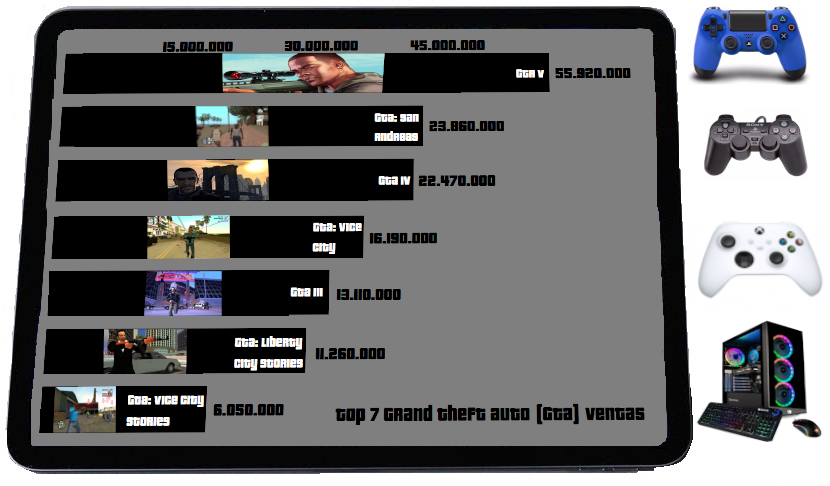